In [1]:
import os

dataset_folder = 'brain_tumor_dataset'

In [2]:
#list of images with no tumors
Negative = os.listdir(dataset_folder + '/no/')

#list of image with tumors
Positive = os.listdir(dataset_folder + '/yes/')

print(f'There are {len(Negative)} MRI scans of brains with no tumor')
print(f'There are {len(Positive)} MRI scans of brains with tumor')

There are 97 MRI scans of brains with no tumor
There are 154 MRI scans of brains with tumor


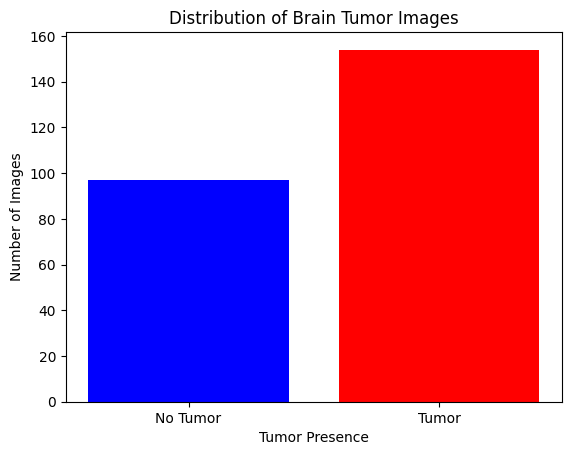

In [3]:
import matplotlib.pyplot as plt

labels = ['No Tumor', 'Tumor']
counts = [len(Negative), len(Positive)]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Tumor Presence')
plt.ylabel('Number of Images')
plt.title('Distribution of Brain Tumor Images')
plt.show()

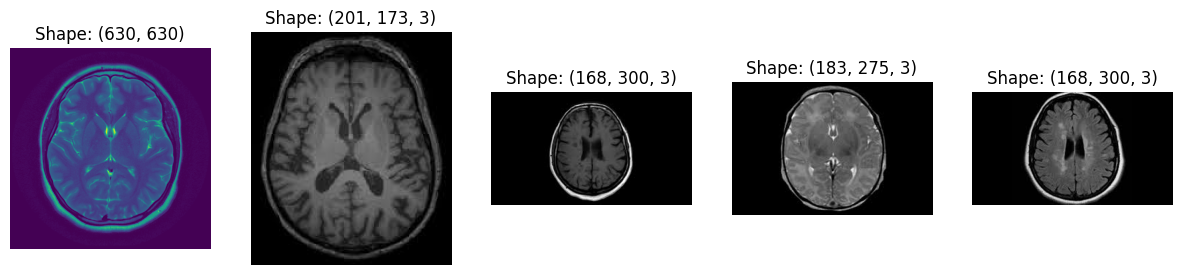

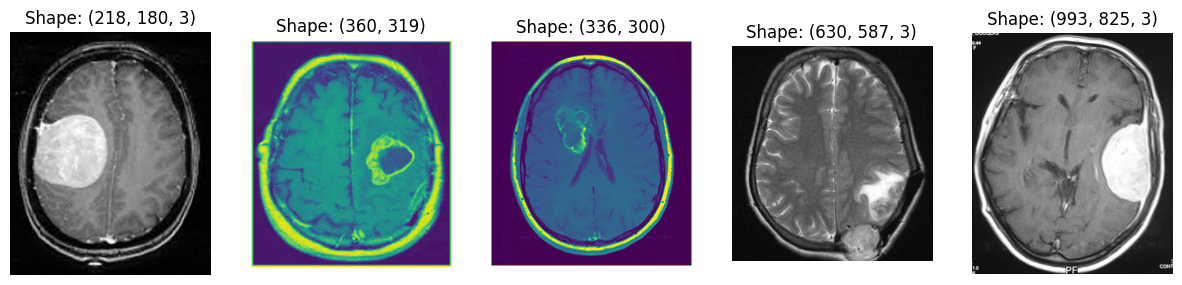

In [4]:
from matplotlib.image import imread

negative_images = os.listdir(os.path.join(dataset_folder, 'no'))

# List of images with tumors
positive_images = os.listdir(os.path.join(dataset_folder, 'yes'))


def plot_image_shapes(image_folder, image_list, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(image_list))):
        image_path = os.path.join(image_folder, image_list[i])
        image = imread(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(f'Shape: {image.shape}')
        plt.axis('off')
    plt.show()

# Plot shapes of some negative images
plot_image_shapes(os.path.join(dataset_folder, 'no'), negative_images)

# Plot shapes of some positive images
plot_image_shapes(os.path.join(dataset_folder, 'yes'), positive_images)

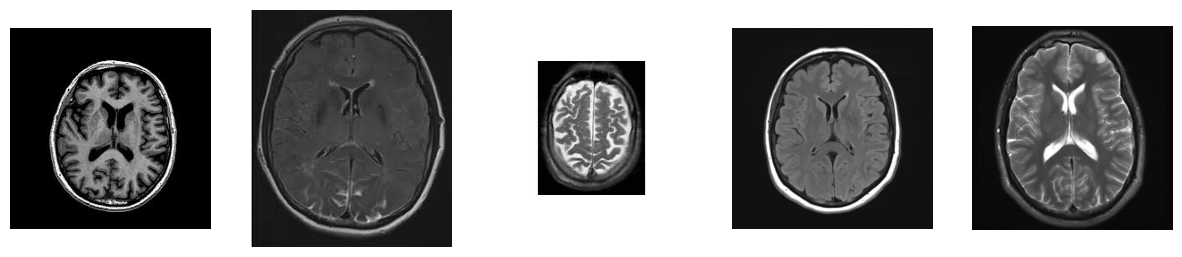

In [5]:
import random

# Function to plot figures with no tumor
def plot_no_tumor_images(image_folder, image_list, num_images=5):
    no_tumor_images = random.sample(image_list, num_images)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(no_tumor_images):
        image_path = os.path.join(image_folder, image_name)
        image = imread(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Plot shapes of some images with no tumor
plot_no_tumor_images(os.path.join(dataset_folder, 'no'), negative_images)

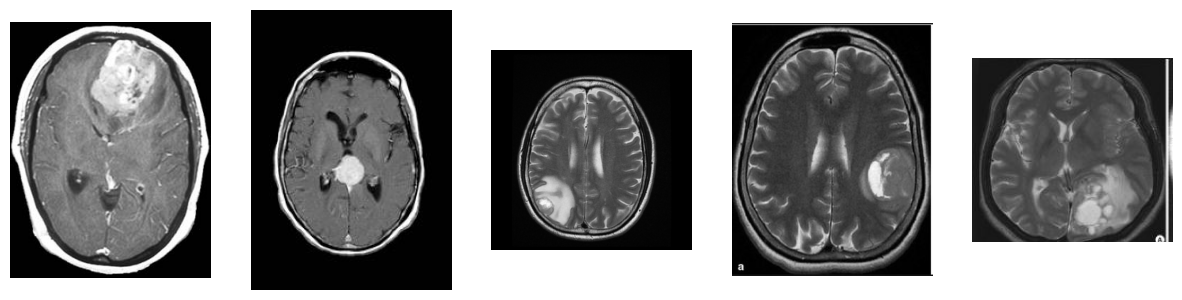

In [6]:
# Function to plot figures with tumor
def plot_tumor_images(image_folder, image_list, num_images=5):
    tumor_images = random.sample(image_list, num_images)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(tumor_images):
        image_path = os.path.join(image_folder, image_name)
        image = imread(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Plot shapes of some images with tumor
plot_tumor_images(os.path.join(dataset_folder, 'yes'), positive_images)


In [11]:
import cv2
import numpy as np
from PIL import Image 

# Define the augmentation functions
def augment_data(image):
    # Flip horizontally
    flipped_img = cv2.flip(image, 1)
    # Rotate 90 degrees
    rotated_img = np.rot90(image)
    return flipped_img, rotated_img

# Augment data for images with no tumors
for img_name in Negative:
    img_path = os.path.join(dataset_folder, 'no', img_name)
    image = cv2.imread(img_path)
    
    # Apply augmentation
    flipped_img, rotated_img = augment_data(image)
    
    # Save augmented images
    cv2.imwrite(os.path.join(dataset_folder, 'no', 'flipped_' + img_name), flipped_img)
    cv2.imwrite(os.path.join(dataset_folder, 'no', 'rotated_' + img_name), rotated_img)

# Augment data for images with tumors
for img_name in Positive:
    img_path = os.path.join(dataset_folder, 'yes', img_name)
    image = cv2.imread(img_path)
    
    # Apply augmentation
    flipped_img, rotated_img = augment_data(image)
    
    # Save augmented images
    cv2.imwrite(os.path.join(dataset_folder, 'yes', 'flipped_' + img_name), flipped_img)
    cv2.imwrite(os.path.join(dataset_folder, 'yes', 'rotated_' + img_name), rotated_img)

print("Data augmentation completed.")

Data augmentation completed.


In [28]:
import os
import numpy as np
from PIL import Image

data = []
labels = []

# Process images without tumors
no_folder = "brain_tumor_dataset/no/"
for img in os.listdir(no_folder):
    image_path = os.path.join(no_folder, img)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)
    labels.append(0)  # Assign label 0 for images without tumors

# Process images with tumors
yes_folder = "brain_tumor_dataset/yes/"
for img in os.listdir(yes_folder):
    image_path = os.path.join(yes_folder, img)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)
    labels.append(1)  # Assign label 1 for images with tumors

# Convert lists to NumPy arrays for easier manipulation
data = np.array(data)
labels = np.array(labels)



In [29]:
data

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [30]:
len(data)

753

In [31]:
data[0].shape

(224, 224, 3)

In [33]:
len(labels)

753

In [35]:
labels.shape

(753,)

In [36]:
x = np.array(data)
y = np.array(labels)

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(677, 224, 224, 3)
(76, 224, 224, 3)
(677,)
(76,)


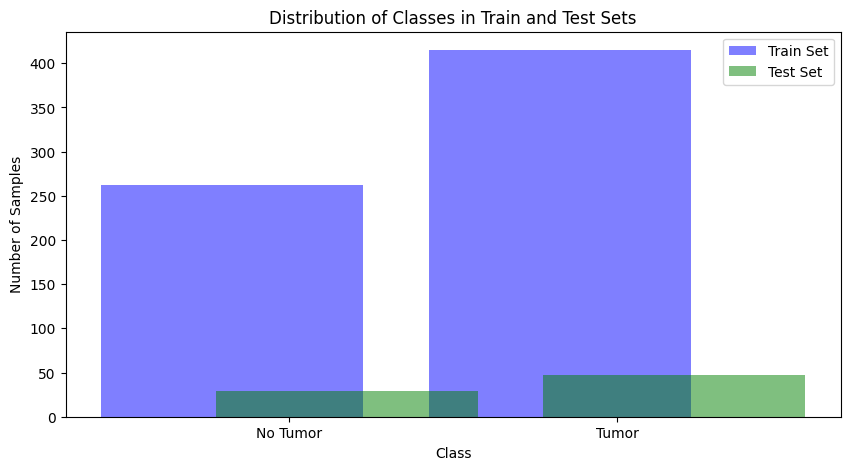

In [43]:
import matplotlib.pyplot as plt

# Count the number of samples for each class in train and test sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Define labels for the classes
class_labels = ['No Tumor', 'Tumor']

# Plotting
plt.figure(figsize=(10, 5))

# Plot train set
plt.bar(np.arange(len(class_labels)), train_counts, color='blue', alpha=0.5, label='Train Set')

# Plot test set
plt.bar(np.arange(len(class_labels))+0.35, test_counts, color='green', alpha=0.5, label='Test Set')

plt.title('Distribution of Classes in Train and Test Sets')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(np.arange(len(class_labels))+0.35/2, class_labels)
plt.legend()

plt.show()


In [41]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [44]:
import tensorflow as tf
from keras import layers, Model

def identity_block(input_tensor, filters, kernel_size):
    """Identity block for ResNet."""
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

def convolutional_block(input_tensor, filters, kernel_size, strides=(2, 2)):
    """Convolutional block for ResNet."""
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x



In [45]:
def build_resnet(input_shape=(224, 224, 3), num_classes=2):
    """Build ResNet model."""
    inputs = layers.Input(shape=input_shape)

    x = layers.ZeroPadding2D((3, 3))(inputs)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = convolutional_block(x, filters=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))
    x = identity_block(x, filters=[64, 64, 256], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))
    x = identity_block(x, filters=[128, 128, 512], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))
    x = identity_block(x, filters=[256, 256, 1024], kernel_size=(3, 3))

    x = convolutional_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))
    x = identity_block(x, filters=[512, 512, 2048], kernel_size=(3, 3))

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [46]:

# Build ResNet model
resnet_model = build_resnet(input_shape=(224, 224, 3), num_classes=2)
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']       

In [48]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = resnet_model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, 
                            validation_split=0.1, callbacks=[early_stopping])

# Save the trained model
resnet_model.save('brain_tumor_resnet_model_with_early_stopping.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(x_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
20/20 [==============================] - 106s 5s/step - loss: 0.8183 - accuracy: 0.6880 - val_loss: 3.5312 - val_accuracy: 0.6471
Epoch 2/100
20/20 [==============================] - 111s 6s/step - loss: 0.6069 - accuracy: 0.7274 - val_loss: 13.1905 - val_accuracy: 0.6471
Epoch 3/100
20/20 [==============================] - 115s 6s/step - loss: 0.5164 - accuracy: 0.7980 - val_loss: 3.6774 - val_accuracy: 0.3529
Epoch 4/100
20/20 [==============================] - 119s 6s/step - loss: 0.5147 - accuracy: 0.7980 - val_loss: 2.7253 - val_accuracy: 0.3529
Epoch 5/100
20/20 [==============================] - 86s 4s/step - loss: 0.4941 - accuracy: 0.7947 - val_loss: 3.6839 - val_accuracy: 0.3529
Epoch 6/100
20/20 [==============================] - 109s 6s/step - loss: 0.3504 - accuracy: 0.8539 - val_loss: 2.4599 - val_accuracy: 0.3529
Epoch 7/100
20/20 [==============================] - 86s 4s/step - loss: 0.3018 - accuracy: 0.8719 - val_loss: 3.5592 - val_accuracy: 0.3529
Epoch 8

c:\Users\96659\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 924ms/step - loss: 0.8793 - accuracy: 0.6579
Test Loss: 0.8793333172798157
Test Accuracy: 0.6578947305679321


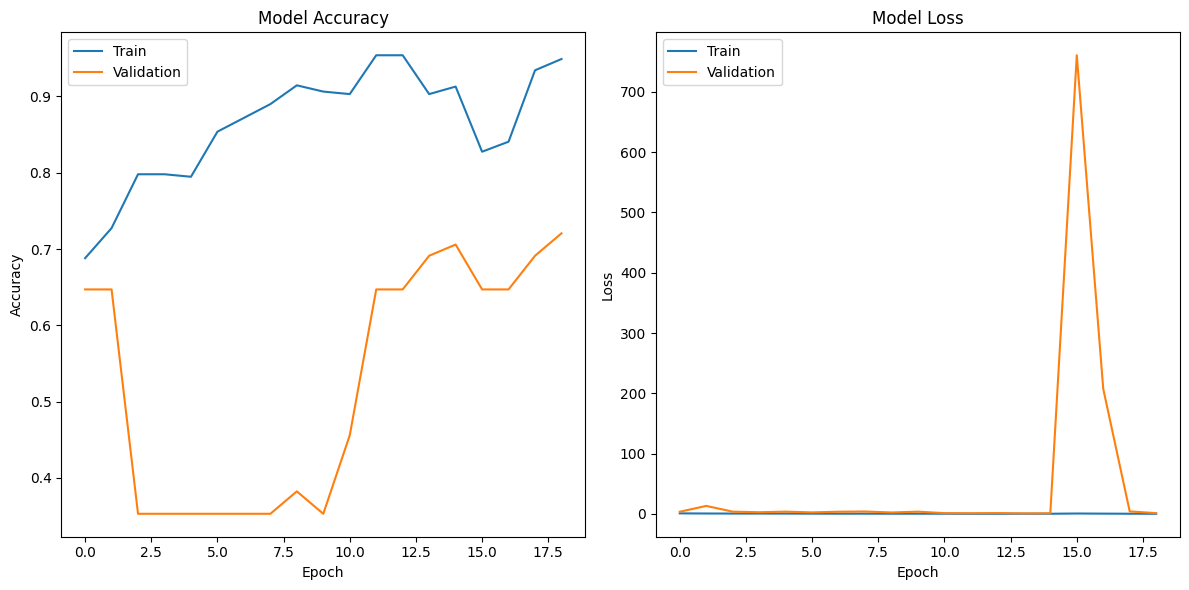

In [49]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import classification_report

# Predict probabilities for test set
y_pred_prob = resnet_model.predict(x_test_scaled)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor'])

# Print classification report
print("Classification Report:")
print(report)


3/3 [==============================] - 4s 944ms/step
Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.62      0.28      0.38        29
       Tumor       0.67      0.89      0.76        47

    accuracy                           0.66        76
   macro avg       0.64      0.58      0.57        76
weighted avg       0.65      0.66      0.62        76



In [54]:
# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor'], output_dict=True)

# Print F1-score and precision for each class
print("F1-score for No Tumor:", report_dict['No Tumor']['f1-score'])
print("Precision for No Tumor:", report_dict['No Tumor']['precision'])

print("F1-score for Tumor:", report_dict['Tumor']['f1-score'])
print("Precision for Tumor:", report_dict['Tumor']['precision'])


F1-score for No Tumor: 0.380952380952381
Precision for No Tumor: 0.6153846153846154
F1-score for Tumor: 0.7636363636363636
Precision for Tumor: 0.6666666666666666


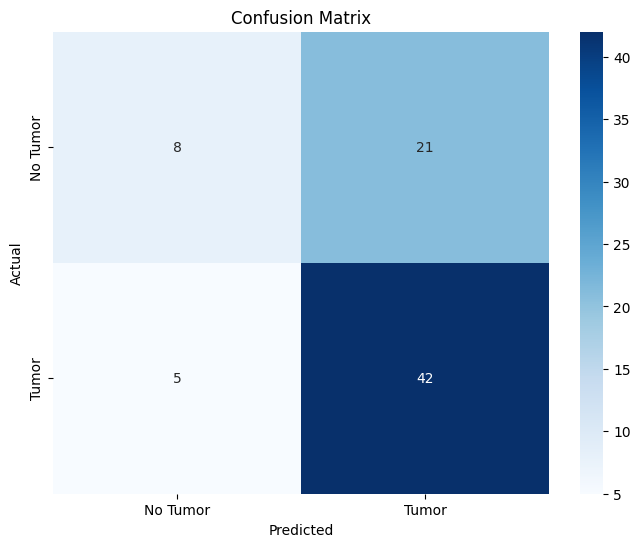

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


3/3 [==============================] - 4s 939ms/step


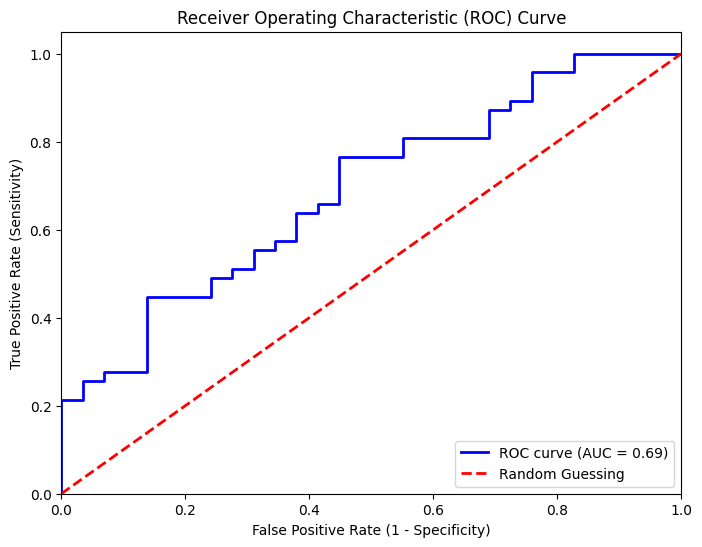

In [57]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for test set
y_pred_prob = resnet_model.predict(x_test_scaled)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # Use the probabilities of class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


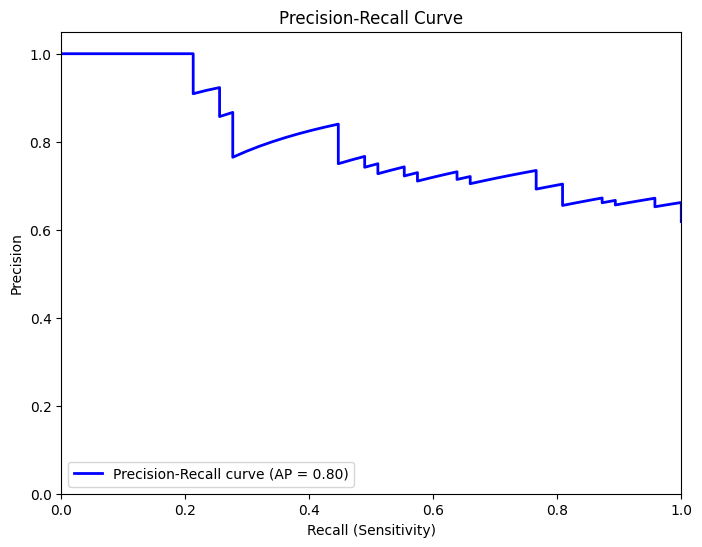

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and average precision for class 1
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
average_precision = average_precision_score(y_test, y_pred_prob[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.show()




1/1 [==============================] - 1s 787ms/step


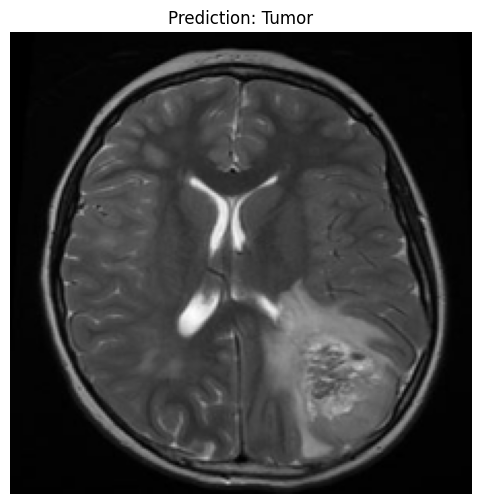

In [4]:
import os
import numpy as np
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('brain_tumor_resnet_model_with_early_stopping.h5')

# Path to the test image
test_image_path = 'brain_tumor_dataset\Test\Y100.JPG'  # Update with the actual path of your test image

# Load and preprocess the test image
test_image = Image.open(test_image_path)
test_image = test_image.resize((224, 224))
test_image = test_image.convert("RGB")
test_image_array = np.array(test_image) / 255.0  # Normalize pixel values

# Reshape the image to match model input shape
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make prediction
prediction = model.predict(test_image_array)

# Get the predicted class (0: No Tumor, 1: Tumor)
predicted_class = np.argmax(prediction)

# Display the test image
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.axis('off')

# Print the predicted class
if predicted_class == 0:
    plt.title("Prediction: No Tumor")
else:
    plt.title("Prediction: Tumor")

plt.show()
